In [57]:
import os

import numpy as np
import matplotlib.pyplot as plt

In [58]:
plt.rc("font", family=["Helvetica", "Arial"])
plt.rc("text", usetex=True)
plt.rc("xtick", top=True, direction="in")
plt.rc("ytick", right=True, direction="in")

In [59]:
DATA_PATH = "../Data/HashingWithChaining/"

# Avg. over multiple seeds
n_keys = np.loadtxt(fname=DATA_PATH+os.listdir(DATA_PATH)[0], dtype=float)[:,0].astype(int)
avg_pr_key_insertion_time, avg_pr_key_query_time, avg_max_bucket_len  = [], [], []
counter = 0
for file_name in os.listdir(DATA_PATH):
    if file_name != ".DS_Store":

        data = np.loadtxt(fname=DATA_PATH+file_name, dtype=float)
        insertion_time, max_bucket_len, query_time = data[:,1], data[:,2], data[:,3]

        avg_pr_key_insertion_time.append([insertion_time[i] / data[:,0][i] for i in range(len(data[:,0]))])
        avg_pr_key_query_time.append([query_time[i] / data[:,0][i] for i in range(len(data[:,0]))])
        avg_max_bucket_len.append(max_bucket_len.tolist())

        counter += 1

avg_max_bucket_len = np.mean(np.array(avg_max_bucket_len),axis=0)
avg_pr_key_insertion_time = np.mean(np.array(avg_pr_key_insertion_time),axis=0)
avg_pr_key_query_time = np.mean(np.array(avg_pr_key_query_time),axis=0)


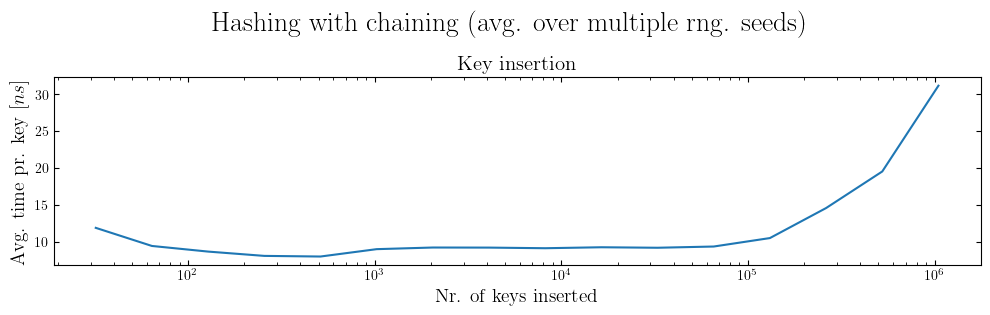

In [60]:
fig, ax = plt.subplots(1,1,figsize=(10,3))
fig.suptitle("Hashing with chaining (avg. over multiple rng. seeds)", size=20)
fig.tight_layout(pad=1.5)
# Checking that insertion is approx. avg. O(1)
ax.set_title("Key insertion", size=15)
ax.plot(n_keys, avg_pr_key_insertion_time)
ax.set_xlabel("Nr. of keys inserted", size=14)
ax.set_ylabel(r"Avg. time pr. key $[ns]$", size=14)
ax.set_xscale('log')
plt.show()

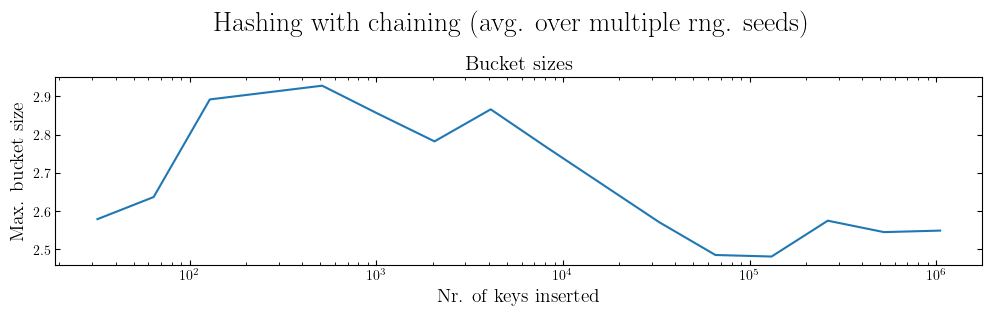

In [61]:
fig, ax = plt.subplots(1,1,figsize=(10,3))
fig.suptitle("Hashing with chaining (avg. over multiple rng. seeds)", size=20)
fig.tight_layout(pad=1.5)
# Checking max bucket size
ax.set_title("Bucket sizes", size=15)
ax.plot(n_keys, avg_max_bucket_len)
ax.set_xlabel("Nr. of keys inserted", size=14)
ax.set_ylabel(r"Max. bucket size", size=14)
ax.set_xscale('log')
plt.show()

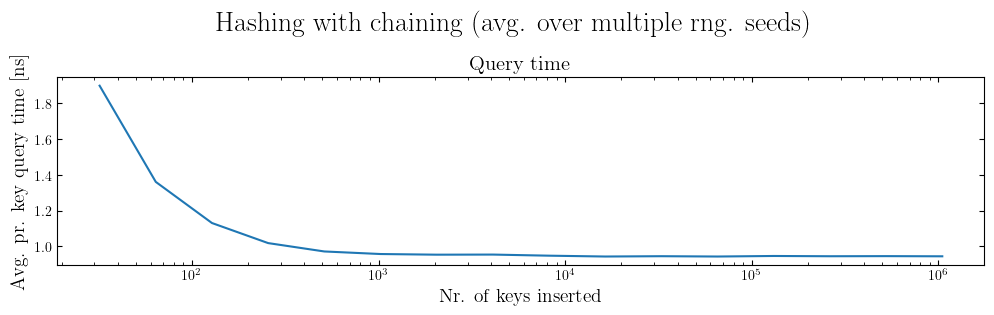

In [62]:
fig, ax = plt.subplots(1,1,figsize=(10,3))
fig.suptitle("Hashing with chaining (avg. over multiple rng. seeds)", size=20)
fig.tight_layout(pad=1.5)
# Checking max bucket size
ax.set_title("Query time", size=15)
ax.plot(n_keys, avg_pr_key_query_time)
ax.set_xlabel("Nr. of keys inserted", size=14)
ax.set_ylabel(r"Avg. pr. key query time [ns]", size=14)
ax.set_xscale('log')
plt.show()